# Description

•	This SUV (Sport Utility Vehicle) data contains the information of customers Gender, Age, Estimated Salary and Purchase
    details.
•	The problem is to find what kind of people like to purchase SUV and give suggestions to Improve business 
•	And make analysis on each attribute and build a Logistic Regression model to predict values.

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [122]:
# Read the SUV dataset
data=pd.read_csv("SUV Data.csv")
data.head()

,User_ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# check how many records having this data
data.shape # it represent the total no.of Rows & Columns having the dataset

(400, 5)

In [4]:
# knowing the no.of records and the Data type of each variable helps to further analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User_ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
# make summary statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


              Age
mean    37.655000
median  37.000000
std     10.482877
skew     0.231337
kurt    -0.622513


C:\Users\Shukur SK\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


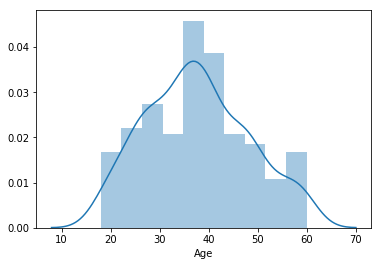

In [6]:
print(pd.DataFrame(data.Age.agg(["mean","median","std","skew","kurt"]))) # to check all parameters
sns.distplot(data["Age"])

The Age data is almost normaly distributed
but some of the data points skewed to the right
meand and median almost equel the difference is only 0.65
and standard deviation also not that much high its near to 10.5 

                   0
mean    69742.500000
median  70000.000000
std     34096.960282
skew        0.495024
kur        -0.405878


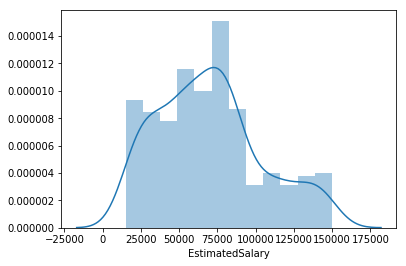

In [7]:
print(pd.DataFrame({"mean":[data.EstimatedSalary.mean()],"median":[data.EstimatedSalary.median()],
                   "std":[data.EstimatedSalary.std()],"skew":[data.EstimatedSalary.skew()],
                   "kur":[data.EstimatedSalary.kurt()]}).T) # to check all parameters
sns.distplot(data["EstimatedSalary"])

The EstimatedSalary datai is not normaly distributed
EstimatedSalary data points are skewed to the right
and Standard devition also very high and EstimatedSalary std is almost half of the EstimatedSalary mean

In [8]:
data.drop(["User_ID"],axis=1,inplace=True) # Drop User_ID column because we are not going to use that attribute and also no use

In [9]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


   Purchased  Percent
0        257     64.0
1        143     36.0


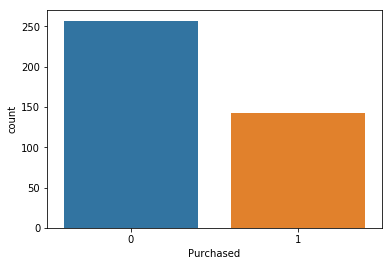

In [10]:
# 0 = No(Not Purchased), 1 = Yes(Purchased)
sns.countplot(x='Purchased', data=data)
print(pd.DataFrame({"Purchased":data["Purchased"].value_counts(),
                          "Percent":round(data["Purchased"].value_counts(normalize=True),2)*100}))

In [11]:
# describe the customer  Age based on the SUV purchases
data.groupby("Purchased").Age.describe()

,count,mean,std,min,25%,50%,75%,max
Purchased,,,,,,,,
0,257.0,32.793774,7.985844,18.0,26.0,34.0,38.0,59.0
1,143.0,46.391608,8.612172,27.0,39.5,47.0,53.0,60.0


In [12]:
# to know the no.of SUV Purchased customers Age above 38 years old.
data[(data.Age>38)& (data.Purchased==1)].shape 

(113, 4)

here 79% of the customers who purchased the SUV their Age is above 38   years
and remaining 21% of the customers Age is between 27 to 38
so above 38 years old customers are likely to by SUV

In [13]:
# describe the customer  Salary based on the SUV purchases
data.groupby("Purchased").EstimatedSalary.describe()

,count,mean,std,min,25%,50%,75%,max
Purchased,,,,,,,,
0,257.0,60544.747082,24351.570102,15000.0,44000.0,61000.0,77000.0,141000.0
1,143.0,86272.727273,42064.200064,20000.0,41000.0,90000.0,122500.0,150000.0


In [14]:
data.groupby("Purchased").EstimatedSalary.quantile(0.4)

Purchased
0    55800.0
1    78800.0
Name: EstimatedSalary, dtype: float64

here 60% customers who purchased the SUV their Salary is above 78000
and remaining 40% of the customers Salary is between 20000 to 78000
so most of the purchased customers salary is above 78000
and high Salary customers are tent to purchase SUV

In [15]:
no_purchase=data[data.Purchased==0] # create non purchased customers data
purchase=data[data.Purchased==1] # create purchased customers data
print(pd.DataFrame({"Purchased":purchase["Gender"].value_counts(),
                          "Percent":round(purchase["Gender"].value_counts(normalize=True),2)*100}))

        Purchased  Percent
Female         77     54.0
Male           66     46.0


In [16]:
# lets try to find out purchased customer Age and Salary pattern
purchase.groupby("Gender")["Age","EstimatedSalary"].describe()

Age                                                     \
       count       mean       std   min   25%   50%   75%   max   
Gender                                                            
Female  77.0  47.155844  8.463645  27.0  42.0  48.0  53.0  60.0   
Male    66.0  45.500000  8.762244  28.0  39.0  46.0  50.5  60.0   

       EstimatedSalary                                                         \
                 count          mean           std      min      25%      50%   
Gender                                                                          
Female            77.0  88714.285714  43123.097103  20000.0  41000.0  96000.0   
Male              66.0  83424.242424  40937.122745  20000.0  41250.0  87500.0   

                            
             75%       max  
Gender                      
Female  130000.0  150000.0  
Male    117750.0  150000.0

in Gender there is a slight deference in Age and Salary. 
Females are greater than Male in Age and Salary.
so high salary Male and Female likely to purchase SUV.

In [17]:
# lets try to find out non purchased customer Age and Salary pattern
no_purchase.groupby("Gender")["Age","EstimatedSalary"].describe()

Age                                                     \
        count       mean       std   min   25%   50%   75%   max   
Gender                                                             
Female  127.0  33.110236  8.468643  18.0  27.0  33.0  39.0  59.0   
Male    130.0  32.484615  7.504246  18.0  26.0  34.5  38.0  49.0   

       EstimatedSalary                                                         \
                 count          mean           std      min      25%      50%   
Gender                                                                          
Female           127.0  61480.314961  25248.243816  15000.0  44000.0  62000.0   
Male             130.0  59630.769231  23504.292355  15000.0  43500.0  60500.0   

                           
            75%       max  
Gender                     
Female  79000.0  134000.0  
Male    76750.0  141000.0

if you compare non purchased customer Age and Salary is less than the purchased customer Age and Salary.
So higher the Age and Salary customers are fall into the SUV purchase group.

In [59]:
# applying pivot_table for better analysis
pd.pivot_table(data, values=['Age'], index=['Gender'],columns=['Purchased'], aggfunc="count",margins=True)# Age for just a value

Age          
Purchased    0    1  All
Gender                  
Female     127   77  204
Male       130   66  196
All        257  143  400

In [91]:
# checking the likelyhood of probability for each possibility
print("The likelyhood of a Female being a SUV Purchased is :",round(77/204,2)*100,"%")
print("The likelyhood of a Male being a SUV Purchased is :",round(66/196,2)*100,"%")
print("The likelyhood of a SUV Purchased being a Female is :",round(77/143,2)*100,"%")
print("The likelyhood of a SUV Purchased being a Male is :",round(66/143,2)*100,"%")
print("There is a",round(77/204*204/400+66/196*196/400,2)*100,"%","chances of someone being a SUV Purchased") # probability(SUV Purchased)

The likelyhood of a Female being a SUV Purchased is : 38.0 %
The likelyhood of a Male being a SUV Purchased is : 34.0 %
The likelyhood of a SUV Purchased being a Female is : 54.0 %
The likelyhood of a SUV Purchased being a Male is : 46.0 %
There is a 36.0 % chances of someone being a SUV Purchased


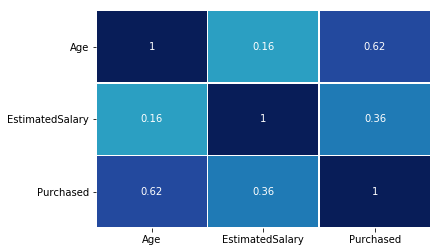

In [95]:
# check correlation between attributes
sns.heatmap(data.corr(),annot=True, linewidths=.5,center=0,cbar=False,cmap="YlGnBu")
#sns.pairplot(data) 
#data.corr() # to check correlation with each attribute

Age and Purchase attributes are having possitive correlation.

# Feature Selection

In [123]:
# Separate the independent attributes i.e. columns 0 to 3 and store them in X array
# Store the target column (column 4) into Y array
data["Sex"]=pd.get_dummies(data["Gender"],drop_first=True) # 1= Male, 0=Female
data.drop(["Gender"], axis=1, inplace=True)

In [125]:
x=data[["Age","EstimatedSalary","Sex"]]
y=data['Purchased']

# Model Creation

In [ ]:
####### --------------------------- Logistic Model --------------------------------------

In [127]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
# Prepare data for logistic regression
#logistic modeling algorithm requires feature array not dataframe

X_train,x_test,Y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=1)

In [128]:
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Shukur SK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [129]:
prd=model.predict(x_test)

In [130]:
confusion_matrix(y_test,prd)

array([[69,  3],
       [47,  1]], dtype=int64)

In [131]:
accuracy_score(y_test,prd)*100

58.333333333333336

In [134]:
print(metrics.classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73        72
           1       0.25      0.02      0.04        48

   micro avg       0.58      0.58      0.58       120
   macro avg       0.42      0.49      0.39       120
weighted avg       0.46      0.58      0.46       120



In [ ]:
# Accuracy is low
#The precision and recall for class 1 is low...

In [135]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(x_test)
model.fit(X_train_scaled, Y_train)

predicted_labels = model.predict(X_test_scaled)
metrics.confusion_matrix(y_test, predicted_labels)
print(accuracy_score(y_test, predicted_labels)*100)
print(metrics.classification_report(y_test, predicted_labels))

79.16666666666666
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        72
           1       0.81      0.62      0.71        48

   micro avg       0.79      0.79      0.79       120
   macro avg       0.80      0.76      0.77       120
weighted avg       0.79      0.79      0.79       120



C:\Users\Shukur SK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shukur SK\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\Shukur SK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [136]:
## scaled Logistic Regression algorithm gives the best result for class 1 till now.